### FE670 - Assignment #2

**Author**: Sid Bhatia

**Date**: October 12th, 2023

**Pledge**: I pledge my honor that I have abided by the Stevens Honor System.

**Professor**: Dr. Steve Yang

#### Problem #1

Given $n$ securities with Expected Return Vector $\bm{\mu}$ and Covariance Matrix $\bm{\Sigma}$, the return of a portfolio with weights $\mathbf{w}$ is a random variable $R_p = \mathbf{w'R}$ with expected return and variance given by:

$$\mu_p = \mathbf{w'}\bm{\mu} \\ \sigma_p^2 = \mathbf{w'}\bm{\Sigma}\mathbf{w}$$

For now, we simply assume that expected returns, $\bm{\mu}$, and their covariance matrix $\bm{\Sigma}$, are given. To calculate the weights for one possible pair, we choose a targeted mean return, $\mu_0$.  Following Markowitz, the investor’s problem is constrained minimization problem:

$$\min_{w} \frac{1}{2} \mathbf{w'}\bm{\Sigma}\mathbf{w} \\ \text{s.t} \\ \mu_0 = \mathbf{w'}\bm{\mu}, \mathbf{w'1'} = 1, \mathbf{1'} = [1, 1, \cdots, 1]$$

We refer to this version of the classical mean-variance optimization problem as the *risk minimization formulation*, and this problem is a quadratic optimization problem with equality constraints with the solution given by:

$$w = \bm{\lambda}\bm{\Sigma^{-1}}\mathbf{1'} + \bm{\gamma\Sigma^{-1}\mu} \\ \text{where} \\ \bm{\lambda} = \frac{C - \mu_0B}{\Delta}, \bm{\gamma} = \frac{\mu_0A - B}{\Delta} \\ A = \bm{1'\Sigma^{-1}1}, B = \bm{1'\Sigma^{-1}\mu}, C = \bm{\mu'\Sigma^{-1}\mu} \\ \Delta = \mathbf{AC - B^2}$$

It is easy to see that:

$$\sigma_0^2 = \mathbf{w'}\bm{\Sigma^{-1}}\mathbf{w} \\ = \frac{A\mu_0^2 - 2B\mu_0 + C}{\Delta}$$

Now, we take $n = 2$ and denote the optimal solution by $w(\sigma_0^2)$, and assume that the expected $\bf{\mu} = \begin{pmatrix} 0.05 \\ 0.10 \end{pmatrix}$ and $\bf{\Sigma} = \begin{pmatrix} 0.01 & - 0.01 \\ -0.01 & 0.04 \end{pmatrix}$, please answer the following questions:

1. Please plot the efficient frontier of the portfolio, and calculate variance when $\bm{\mu_0} = 0.10$ and $\bm{\mu_0} = 0.20$ manually.

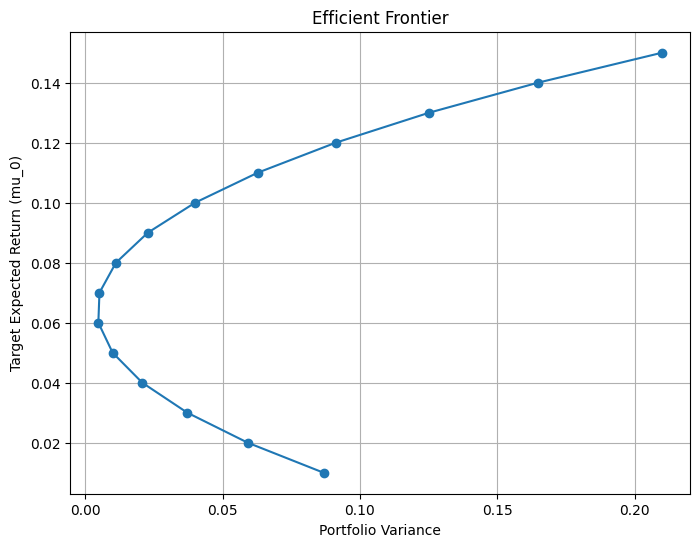

Portfolio Variance for mu_0 = 0.10: 0.04
Portfolio Variance for mu_0 = 0.20: 0.52


In [1]:
import numpy as np
import matplotlib.pyplot as plt

mu = np.array([0.05, 0.10])
covariance_matrix = np.array([[0.01, -0.01], [-0.01, 0.04]])

# Calculate inverse of covariance matrix.
sigma_inverse = np.linalg.inv(covariance_matrix)

# Create a range of target expected returns (mu_0).
mu_0_range = np.arange(0.01, 0.16, 0.01)

# Initialize arrays to store portfolio variances.
portfolio_variances = []


# Define respective solution variables.
ones = np.ones(2)
A = ones @ sigma_inverse @ ones
B = ones @ sigma_inverse @ mu
C = mu @ sigma_inverse @ mu
Delta = A * C - B**2

def calc_sigma_0_squared(A, B, C, Delta, mu_0):
    """
    Write a function to calculate sigma_0_squared based on A, B, C, Delta, and mu_0.
    """
    sigma_0_squared = (A * mu_0**2 - 2 * B * mu_0 + C) / Delta
    return sigma_0_squared

# Calculate portfolio variances for each mu_0.
for mu_0 in mu_0_range:
    portfolio_variances.append(calc_sigma_0_squared(A, B, C, Delta, mu_0))

# Plot the Efficient Frontier.
plt.figure(figsize=(8, 6))
plt.plot(portfolio_variances, mu_0_range, marker='o', linestyle='-')
plt.title('Efficient Frontier')
plt.xlabel('Portfolio Variance')
plt.ylabel('Target Expected Return (mu_0)')
plt.grid(True)
plt.show()

# Calculate portfolio variance for mu_0 = 0.10 and mu_0 = 0.20.
mu_0_1 = 0.10
mu_0_2 = 0.20

sigma_0_1_squared = calc_sigma_0_squared(A, B, C, Delta, mu_0_1)
sigma_0_2_squared = calc_sigma_0_squared(A, B, C, Delta, mu_0_2)

print(f'Portfolio Variance for mu_0 = 0.10: {sigma_0_1_squared:.2f}')
print(f'Portfolio Variance for mu_0 = 0.20: {sigma_0_2_squared:.2f}')

2. If we introduce a risk free rate $R_f = 0.02$, please find the **market portfolio** of these two stock portfolio, and calculate the slope of the **Capital Market Line (CML)** along with the portfolio frontier.

In this case, the portfolio's expected return and variance are:

$$\mu_p = \mathbf{w'_R}\bm{\mu} + (1 - \mathbf{w'_R}I)R_f \\ \sigma_p^2 = \mathbf{w'_R}\Sigma{w_R}$$

since the risk-free asset has zero variance and is uncorrelated with the risky assets.

As such, the investor's objective is again for a targeted level of expected portfolio return, $\mu_0$, to choose allocations by solving a quadratic optimization problem:

$$\min_{w_R}\mathbf{w'_R}\Sigma\mathbf{w_R} \\ \text{subject to} \\ \mu_0 = \mathbf{w'_R}\bm{\mu} + (1 - \mathbf{w'_R}I)R_f$$

The optimal portfolio weights are given by:

$$\mathbf{w_R} = C\bm{\Sigma^{-1}}(\bm{\mu} - R_f \mathbf{I}) \\ \text{where} \\ C = \frac{\mu_0 - R_f}{(\bm{\mu} - R_f \mathbf{I})'\Sigma^{-1}(\bm{\mu} - R_f \mathbf{I})}$$

Therefore, with a risk-free asset, all minimum variance portfolios are a combination of the risk-free asset and a given risky portfolio. The risky portfolio is often called tangency portfolio or market portfolio.

The slope of the Capital Market Line (CML) is defined as:

$$S = \frac{\mu_m - R_f}{\sigma_m}$$

In [18]:
R_f = 0.02

# Calculate the difference between risky asset returns and the risk-free rate.
mu_diff = mu - R_f * ones

# Define a function to calculate market portfolio weights and CML slope
def calculate_market_portfolio(mu_0):
    # Calculate the scalar C.
    C = (mu_0 - R_f) / (mu_diff @ sigma_inverse @ mu_diff)

    # Calculate the market portfolio weights for the risky assets.
    w_R = C * sigma_inverse @ mu_diff

    # Calculate the expected return of the market portfolio.
    mu_m = w_R @ mu + (1 - w_R @ ones) * R_f

    # Calculate the standard deviation (risk) of the market portfolio.
    sigma_m = np.sqrt(w_R @ covariance_matrix @ w_R)

    # Calculate the slope of the CML (S).
    S = (mu_m - R_f) / sigma_m

    return w_R, mu_m, sigma_m, S

mu_0 = 0.10
w_R, mu_m, sigma_m, S = calculate_market_portfolio(mu_0)

# Print the results.
print(f"Market Portfolio Weights for Risky Assets (w_R): {w_R}")
print(f"Expected Return of the Market Portfolio (mu_m): {mu_m:.4f}")
print(f"Standard Deviation of the Market Portfolio (sigma_m): {sigma_m:.4f}")
print(f"Slope of the CML (S): {S:.4f}")

Market Portfolio Weights for Risky Assets (w_R): [1.08108108 0.59459459]
Expected Return of the Market Portfolio (mu_m): 0.1000
Standard Deviation of the Market Portfolio (sigma_m): 0.1139
Slope of the CML (S): 0.7024


#### Problem #2

Suppose that are $N = 3$ assets $s_1$, $s_2$, and $s_3$ respectively. The covariance matrix and expected rates of return are:

$$\bm{\Sigma} = \begin{bmatrix}
3.0 & 1.5 & 0.0 \\
1.5 & 3.0 & 1.5 \\
0.0 & 1.5 & 3.0
\end{bmatrix} \text{and} \; \bm{\mu} = \begin{bmatrix}
0.5 \\
0.3 \\
0.7
\end{bmatrix}$$

One of the basic assumptions underlying the Black-Litterman model is that the expected return of a security should be consistent with market equilibrium unless the investor has a specific view on the security, and the market equilibrium can be expressed as:

$$\bm{\Pi} = \bm{\mu} + \bm{\epsilon_{\Pi}}, \bm{\epsilon_{\Pi}} \sim \mathcal{N}(0, \tau\bm{\Sigma})$$

for some parameter $\tau << 1$. We can think about $\tau\bm{\Sigma}$ as our confidence in how well we can estimate the equilibrium expected returns.

Formally, $K$ views in Black-Litterman model are expressed as a vector $\mathbf{q}$ with:

$$\mathbf{q} = \mathbf{P}\bm{\mu} + \bm{\epsilon_q}, \bm{\epsilon_q} \sim \mathcal{N}(0, \bm{\Omega})$$

where $\mathbf{P}$ is a $K \times K$ matrix (explained in the following example) and $\bm{\Omega}$ is a $K \times K$ matrix expressing the confidence in the views.

Let us assume that the asset universe that we consider the three stocks and that an investor has the following two views ($K = 2$): (1) $s_1$ will have a return of $2.0\%$. (2) $s_3$ will outperform $s_2$ by $4.0\%$. Mathematically, we express the two views together as:

$$\begin{bmatrix} 2.0\% \\ 4.0\% \end{bmatrix} = \begin{bmatrix} 1 & 0 & 0 \\ 0 & -1 & 1 \end{bmatrix} 

\begin{bmatrix} \mu_1 \\ \mu_2 \\ \mu_3 \end{bmatrix} + \begin{bmatrix} \epsilon_1 \\ \epsilon_2 \end{bmatrix}$$

We also assume a higher confidence in the views, and conversely we have:

$$\bm{\Omega} = \begin{bmatrix} 5\%^2 & 0 \\ 0 & 6\%^2 \end{bmatrix}$$

According to Black-Litterman, we will have:

$$\bm{\hat{\mu}}_{BL} = [(\tau\Sigma)^{-1} + \mathbf{P'}\Omega^{-1}\mathbf{P}]^{-1} [(\tau\Sigma)^{-1}\bm{\Pi} + \mathbf{P'}\Omega^{-1}\mathbf{q}]$$

where $\bm{\Pi}$ is the equilibrium risk premium over the risk free rate (3 x 1 vector) which can be calculated as $\bm{\mu}$ over the risk free rate of $r_f = 0.02$. Please answer the following questions using the data provided:

1. Find the minimum variance portfolio - MVP.

The minimum variance portfolio can be found by minimizing the portfolio variance subject to the constraint that the weights sum to 1.

$$W_{MVP} = \frac{\bm{\Sigma^{-1}}\mathbf{1'}}{\mathbf{1'}\bm{\Sigma^{-1}\mathbf{1}}}$$

In [44]:
import numpy as np
from scipy.optimize import minimize

# Establish expected returns and covariance matrices.
Sigma = np.array([[3.0, 1.5, 0.0], 
                              [1.5, 3.0, 1.5], 
                              [0.0, 1.5, 3.0]])
                              
mu = np.array([0.5, 
               0.3, 
               0.7])

Sigma_inverse = np.linalg.inv(Sigma)

# Define the objective function to minimize portfolio variance.
def portfolio_variance(weights, Sigma):
    return weights @ Sigma @ weights

# Define the constraint that the sum of portfolio weights equals 1.
constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})

# Initial guess for portfolio weights (e.g., equal weights).
initial_weights = np.array([1/3, 1/3, 1/3])

# Set bounds for weights (0 <= weights <= 1).
bounds = ((0, 1), (0, 1), (0, 1))

# Perform the optimization to find the MVP.
result = minimize(portfolio_variance, initial_weights, args=(Sigma,), constraints=constraints, bounds=bounds)

# Extract the optimized portfolio weights.
mvp_weights = result.x

# Print the Minimum Variance Portfolio weights.
print("Minimum Variance Portfolio Weights:")
print(mvp_weights)

# Calculate the minimum variance (portfolio variance) of the MVP.
min_variance = result.fun
print("Minimum Variance (Portfolio Variance):", min_variance)

# Create ones matrix.
ones = np.ones(3)

# Find MVP using formula defined above.
w_mvp = (Sigma_inverse @ ones) / (ones @ Sigma_inverse @ ones)
print("Minimum Variance Portfolio (MVP) Weights using Formula:", w_mvp)

Minimum Variance Portfolio Weights:
[4.99999993e-01 5.55111512e-17 5.00000007e-01]
Minimum Variance (Portfolio Variance): 1.5
Minimum Variance Portfolio (MVP) Weights using Formula: [0.5 0.  0.5]


2. If the risk free rate is $r_f$ , find an efficient portfolio risky assets, and plot the efficient portfolio frontier.

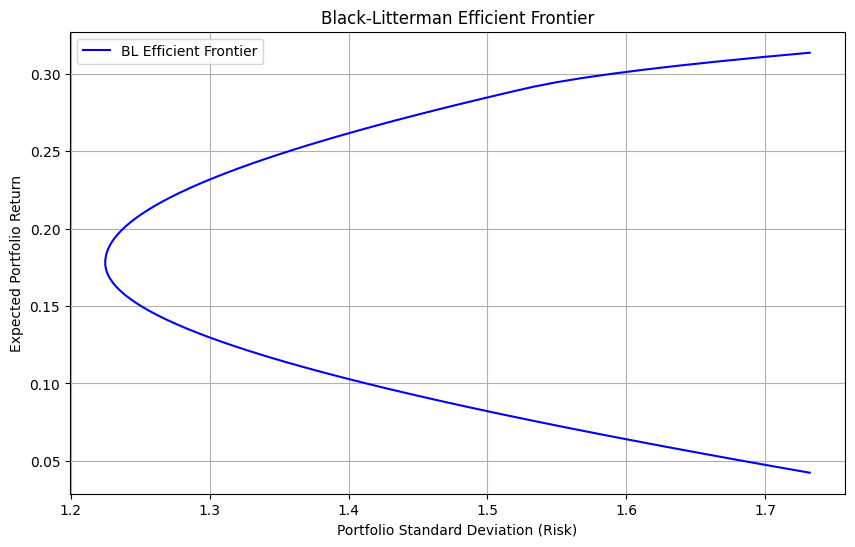

In [46]:
# Define other matrices for BL model.
P = np.array([[1, 0, 0], 
              [0, -1, 1]])

# Establish 2.0% and 4.0% views.
q = np.array([0.02, 0.04])

Omega = np.array([[0.05**2, 0], 
                  [0, 0.06**2]])

tau = 0.03
rf = 0.02

Pi = mu - rf
M_inverse = np.linalg.inv(tau * Sigma)
adj_return = np.linalg.inv(M_inverse + P.T @ np.linalg.inv(Omega) @ P)
adj_return = adj_return @ (M_inverse @ Pi + P.T @ np.linalg.inv(Omega) @ q)

# Create a range of desired returns.
desired_returns = np.linspace(min(adj_return), max(adj_return), 100)
portfolio_risks = []

for mu_star in desired_returns:
    # Define the quadratic problem
    A = 2 * Sigma
    B = np.zeros(mu.shape[0])
    C = 0
    constraints = [{'type': 'eq', 'fun': lambda w: w @ adj_return - mu_star},
                   {'type': 'eq', 'fun': lambda w: np.sum(w) - 1}]
    bounds = [(0, 1) for _ in mu]
    initial_guess = [1./mu.shape[0] for _ in mu]

    # Minimize the negative Sharpe ratio.
    from scipy.optimize import minimize
    solution = minimize(lambda w: w.T @ Sigma @ w, initial_guess, constraints=constraints, bounds=bounds)
    w_optimal = solution.x

    # Compute portfolio risk.
    port_variance = w_optimal.T @ Sigma @ w_optimal
    port_std = np.sqrt(port_variance)
    portfolio_risks.append(port_std)

# Plot the efficient frontier.
plt.figure(figsize=(10, 6))
plt.plot(portfolio_risks, desired_returns, 'b-', label="BL Efficient Frontier")
plt.xlabel("Portfolio Standard Deviation (Risk)")
plt.ylabel("Expected Portfolio Return")
plt.title("Black-Litterman Efficient Frontier")
plt.legend()
plt.grid(True)
plt.show()

In [31]:
# import numpy as np
# import matplotlib.pyplot as plt

# # Given data
# Sigma = np.array([[3.0, 1.5, 0.0],
#                   [1.5, 3.0, 1.5],
#                   [0.0, 1.5, 3.0]])

# mu = np.array([0.5, 0.3, 0.7])
# rf = 0.02

# # Initialize lists to store efficient portfolio risk and return values
# risk_levels = np.linspace(0.05, 0.5, 100)  # Adjust risk levels as needed
# expected_returns_ef = []  # Efficient Frontier
# expected_returns_cml = []  # Capital Market Line

# ones = np.ones(3)  # Vector of ones

# for risk in risk_levels:
#     # Calculate the efficient portfolio using the CML equation
#     w_risky = ((mu - rf) / (np.sqrt(np.dot(np.dot(Sigma, np.linalg.inv(Sigma)), mu - rf)))) * risk
#     w_risk_free = 1 - np.sum(w_risky)
    
#     # Portfolio expected return and standard deviation
#     mu_portfolio = w_risk_free * rf + np.dot(w_risky, mu)
#     sigma_portfolio = np.sqrt(np.dot(np.dot(w_risky, Sigma), w_risky))
    
#     expected_returns_cml.append(mu_portfolio)

# # Convert the lists to NumPy arrays for plotting
# risk_levels = np.array(risk_levels)
# expected_returns_cml = np.array(expected_returns_cml)

# # Calculate the Efficient Frontier
# returns_ef = []
# risks_ef = []

# for target_return in np.linspace(mu.min(), mu.max(), 100):
#     # Set up the optimization problem to find the minimum risk portfolio for a given target return
#     from scipy.optimize import minimize

#     def portfolio_risk(weights):
#         return np.sqrt(weights @ Sigma @ weights)

#     constraints = (
#         {"type": "eq", "fun": lambda weights: weights.sum() - 1},
#         {"type": "eq", "fun": lambda weights: weights @ mu - target_return}
#     )
#     initial_weights = ones / len(mu)
#     result = minimize(portfolio_risk, initial_weights, constraints=constraints)
#     portfolio_weights = result.x

#     # Calculate risk for the portfolio with the given target return
#     portfolio_risk = np.sqrt(portfolio_weights @ Sigma @ portfolio_weights)

#     returns_ef.append(target_return)
#     risks_ef.append(portfolio_risk)

# # Convert the lists to NumPy arrays for plotting
# returns_ef = np.array(returns_ef)
# risks_ef = np.array(risks_ef)

# # Plot the Efficient Frontier and Capital Market Line (CML)
# plt.figure(figsize=(10, 6))
# plt.plot(risks_ef, returns_ef, label="Efficient Frontier", color='green')
# plt.xlabel("Risk (Standard Deviation)")
# plt.ylabel("Expected Return")
# plt.title("Efficient Frontier")
# plt.grid(True)
# plt.legend()
# plt.show()


ValueError: could not broadcast input array from shape (3,) into shape (2,)

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Given data
Sigma = np.array([[3.0, 1.5, 0.0],
                  [1.5, 3.0, 1.5],
                  [0.0, 1.5, 3.0]])

mu = np.array([0.5, 0.3, 0.7])
rf = 0.02
tau = 0.03  # Tau parameter for Black-Litterman

# Views and confidences
views = np.array([0.02, 0.04])  # Views: Expected returns for s1 and s3
P = np.array([[1, 0, 0], [0, 0, -1]])  # P matrix for views
Omega = np.diag([0.05**2, 0.06**2])  # Diagonal Omega matrix for view confidences

# Calculate equilibrium expected returns Pi
Pi = rf + (mu - rf)

# Calculate Black-Litterman adjusted expected returns
Sigma_inverse = np.linalg.inv(tau * Sigma)
PLambda = np.dot(P.T, np.linalg.inv(np.dot(np.dot(P, Sigma_inverse), P.T) + np.linalg.inv(Omega)))
q = np.dot(PLambda, views - np.dot(P, Pi))
adjusted_mu_BL = Pi + np.dot(Sigma_inverse, q)

# Initialize variables
n_assets = len(mu)
n_portfolios = 10000
results = np.zeros((4, n_portfolios))  # Store portfolio risk, return, and weights

for i in range(n_portfolios):
    # Generate random portfolio weights (sum to 1)
    weights = np.random.random(n_assets)
    weights /= np.sum(weights)
    
    # Calculate portfolio expected return and standard deviation (risk)
    portfolio_return = np.sum(weights * adjusted_mu_BL)
    portfolio_stddev = np.sqrt(np.dot(weights.T, np.dot(Sigma, weights)))
    
    # Store portfolio risk and return
    results[0, i] = portfolio_stddev
    results[1, i] = portfolio_return
    
    # Assign weights to results array based on the number of assets
    results[2:n_assets + 2, i] = weights

# Calculate the Sharpe ratio for each portfolio
results[3, :] = (results[1, :] - rf) / results[0, :]

# Find the portfolio with the highest Sharpe ratio (efficient portfolio)
max_sharpe_idx = np.argmax(results[3])
max_sharpe_return = results[1, max_sharpe_idx]
max_sharpe_risk = results[0, max_sharpe_idx]
max_sharpe_weights = results[2:n_assets + 2, max_sharpe_idx]

# Print the efficient portfolio's properties
print("Efficient Portfolio Properties:")
print(f"Expected Return: {max_sharpe_return:.4f}")
print(f"Risk (Standard Deviation): {max_sharpe_risk:.4f}")
print("Weights:")
print(max_sharpe_weights)

# Plot the efficient portfolio frontier
plt.figure(figsize=(10, 6))
plt.scatter(results[0, :], results[1, :], c=results[3, :], cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Risk (Standard Deviation)')
plt.ylabel('Expected Return')
plt.title('Efficient Portfolio Frontier (with Black-Litterman Adjustment)')
plt.scatter(max_sharpe_risk, max_sharpe_return, c='red', marker='*', s=100, label='Efficient Portfolio')
plt.legend()
plt.grid(True)
plt.show()

ValueError: could not broadcast input array from shape (3,) into shape (2,)

Efficient Portfolios (Risk, Expected Return):
[[0.05       0.04939388 0.03714643 0.06164133]
 [0.1        0.07878775 0.05429286 0.10328265]
 [0.15       0.10818163 0.07143928 0.14492398]
 [0.2        0.13757551 0.08858571 0.1865653 ]
 [0.25       0.16696938 0.10573214 0.22820663]
 [0.3        0.19636326 0.12287857 0.26984795]
 [0.35       0.22575714 0.140025   0.31148928]
 [0.4        0.25515102 0.15717143 0.35313061]
 [0.45       0.28454489 0.17431785 0.39477193]
 [0.5        0.31393877 0.19146428 0.43641326]]


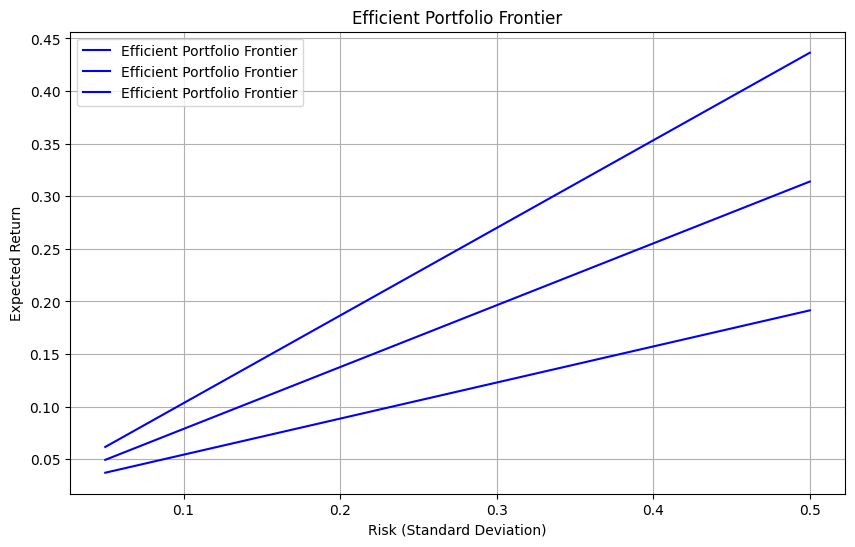

In [24]:
# Initialize the risk free rate.
r_f = 0.02

# Initialize lists to store risk and return values
risk_levels = np.linspace(0.05, 0.5, 10)  # Adjust risk levels as needed
expected_returns = []

for risk in risk_levels:
    # Calculate expected return for each risk level
    mu_efficient = r_f + ((mu - r_f) / np.sqrt(ones.dot(np.linalg.inv(Sigma).dot(ones)))) * risk
    expected_returns.append(mu_efficient)

# Print efficient portfolios (risk, expected return)
efficient_portfolios = np.column_stack((risk_levels, expected_returns))
print("Efficient Portfolios (Risk, Expected Return):")
print(efficient_portfolios)

3. Assume we have $\tau = 0.03$, please calculate the expected return conditional on the views $\bm{\hat{\mu}}_{BL}$.

4. Based on $\bm{\hat{\mu}}_{BL}$ and recalculate the minimum variance portfolio. Please provide comments on the differences between the original MVP and the adjusted MVP.